In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
from datetime import datetime
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Set view options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')

In [3]:
# Read in traffic accidents as geopandas dataframe
accidents = gpd.read_file('../data/Traffic Accidents (2021-09-29)/geo_export_823cdc6a-f88c-4a4d-95e4-76730d44cdf5.shp')

# Convert date and time columns into datetime column
accidents['date_time'] = pd.to_datetime(accidents[['date_date_', 'time_date_']].agg(' '.join, axis = 1))

# Set datetime as index
accidents = accidents.set_index(accidents['date_time'])

# Drop accidents without location coordinates
accidents = accidents.dropna(subset = ['geometry'])

In [4]:
accidents['hour'] = accidents['date_time'].dt.hour
accidents['weekday'] = accidents['date_time'].dt.weekday
accidents['month'] = accidents['date_time'].dt.month

In [5]:
# Count number of accidents per hour
accident_counts = accidents.resample('1h')['accident_n'].nunique().to_frame()

# Create hour, day of week, and day of year columns
accident_counts['hour'] = accident_counts.index.hour
accident_counts['day_of_week'] = accident_counts.index.day_of_week
accident_counts['day_of_year'] = accident_counts.index.day_of_year

# Aggregate accident counts by day of week and hour
accident_counts_by_day_of_week = accident_counts.groupby(['day_of_week', 'hour'], as_index = False).agg('sum')

# Assign accident counts from hour 0 to hour 24 to make line plot look connected
accident_counts_hour_0 = accident_counts_by_day_of_week.loc[accident_counts_by_day_of_week['hour'] == 0]
accident_counts_by_day_of_week = accident_counts_by_day_of_week.append(accident_counts_hour_0.assign(hour = 24)).reset_index()

# Aggregate accident counts by day of year
accident_counts_by_day_of_year = accident_counts.groupby(['day_of_year'], as_index = False).agg('sum')

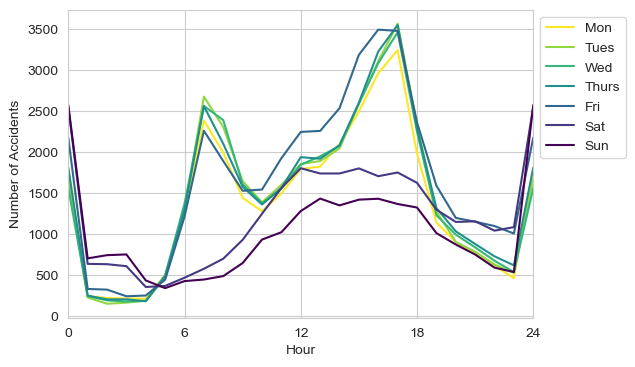

In [6]:
# Plot accidents counts by weekday and hour
fig, ax = plt.subplots(figsize = (6, 4))

sns.lineplot(x = 'hour', y = 'accident_n', data = accident_counts_by_day_of_week, hue = 'day_of_week', palette = 'viridis_r')

ax.set_xlim([0,24])
ax.set_xticks([0,6,12,18,24])
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Accidents')
ax.legend(title='', labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], bbox_to_anchor = (1, 1))

plt.show()

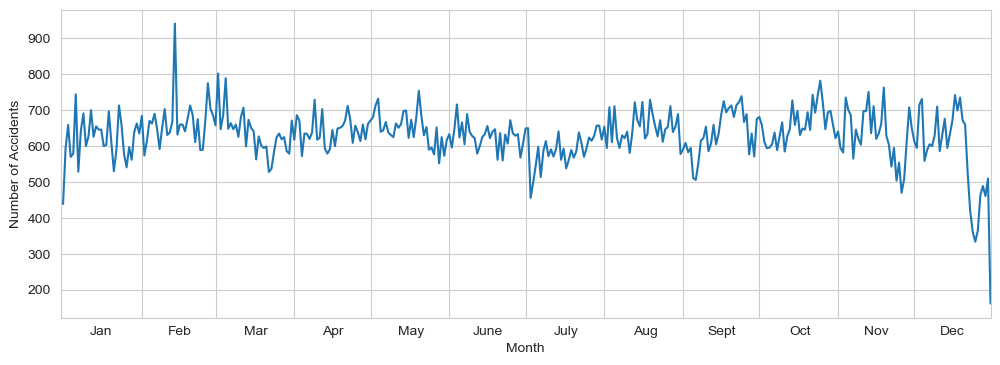

In [7]:
# Plot accidents counts by day of year
fig, ax = plt.subplots(figsize = (12, 4))

sns.lineplot(x = 'day_of_year', y = 'accident_n', data = accident_counts_by_day_of_year)

month_start_days = [32, 61, 92, 122, 153, 183, 214, 245, 275, 306, 336]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
month_label_positions = [16, 47, 77, 107, 138, 168, 199, 230, 260, 291, 321, 351]

ax.set_xlim([0, 366])
ax.set_xticks(month_start_days)
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_locator(ticker.FixedLocator(month_label_positions))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(month_labels))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Accidents')

plt.show()

In [15]:
accidents.head()

,accident_n,date_date_,time_date_,number_of_,number_o_2,number_o_3,property_d,hit_and_ru,reporting_,collision_,collisio_2,weather,weather_de,illuaccide,illuminati,harmfulcod,harmfuldes,street_add,city,state,zip,rpa,precinct,lat,long,geometry,date_time,hour,weekday
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-07-06 12:45:00,20400639785,2014-07-06,12:45:00.000,2.0,0.0,0.0,?,F,473187,5.0,SIDESWIPE - SAME DIRECTION,21.0,CLEAR,1.0,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,MM 93 0 I65 N,MADISON,TN,37115.0,17040.0,MADISO,0.0000,0.0000,POINT (0.00000 0.00000),2014-07-06 12:45:00,12,6
2021-09-27 20:00:00,20210507614,2021-09-27,20:00:00.000,2.0,1.0,0.0,?,F,320601,11.0,Front to Rear,21.0,CLEAR,2.0,DARK - NOT LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,EWING DR & DICKERSON PKE,NASHVILLE,TN,37207.0,1809.0,EAST,36.2294,-86.7593,POINT (-86.75930 36.22940),2021-09-27 20:00:00,20,0
2021-09-27 19:29:00,20210507589,2021-09-27,19:29:00.000,2.0,0.0,0.0,?,F,384443,4.0,ANGLE,21.0,CLEAR,2.0,DARK - NOT LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,RAYWOOD LN & STRASSER DR,NASHVILLE,TN,37211.0,8711.0,SOUTH,36.0603,-86.7143,POINT (-86.71430 36.06030),2021-09-27 19:29:00,19,0
2021-09-27 19:35:00,20210507576,2021-09-27,19:35:00.000,1.0,1.0,0.0,?,F,4001458,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,21.0,CLEAR,3.0,DARK - LIGHTED,9,None,JEFFERSON ST & 7TH AVN,NASHVILLE,TN,37219.0,4237.0,CENTRA,36.1736,-86.7901,POINT (-86.79010 36.17360),2021-09-27 19:35:00,19,0
2021-09-27 18:53:00,20210507521,2021-09-27,18:53:00.000,3.0,0.0,0.0,?,T,384443,11.0,Front to Rear,21.0,CLEAR,3.0,DARK - LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,MM 54 8 I 24,NASHVILLE,TN,37211.0,8812.0,SOUTH,36.0968,-86.7085,POINT (-86.70850 36.09680),2021-09-27 18:53:00,18,0


In [148]:
accidents = pd.read_csv('data/Traffic_Accidents_21_09_29.csv')
accidents.head()

/home/venkatr5/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,Weather Code,Weather Description,Illumination Code,Illumination Description,Harmful Code,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20200606233,09/21/2020 06:37:00 PM,1.0,0.0,0,NaN,False,311344,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,21.0,CLEAR,5.0,DUSK,42;64,TREE;Ran Off Road-Left,LEWIS ST & FAIN ST,NASHVILLE,TN,37210.0,8207.0,HERMIT,36.1518,-86.7580,POINT (-86.758 36.1518)
1,20200603908,09/20/2020 12:00:00 AM,1.0,0.0,0,True,True,409155,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,21.0,CLEAR,1.0,DAYLIGHT,40,MAIL BOX,RICHMOND HILL DR & CARTERWOOD DR,NASHVILLE,TN,37207.0,2005.0,MADISO,36.2323,-86.7733,POINT (-86.7733 36.2323)
2,20200604395,09/20/2020 07:20:00 PM,1.0,1.0,0,NaN,False,330419,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NaN,NaN,3.0,DARK - LIGHTED,11,OTHER ANIMAL,SHUTE LN & SAUNDERSVILLE RD,OLD HICKORY,TN,37138.0,9717.0,HERMIT,36.2267,-86.6032,POINT (-86.6032 36.2267)
3,20200605021,09/21/2020 05:58:00 AM,2.0,0.0,0,NaN,False,256569,5.0,SIDESWIPE - SAME DIRECTION,NaN,NaN,4.0,DAWN,12,MOTOR VEHICLE IN TRANSPORT,MURFREESBORO PKE & WILHAGAN RD,NASHVILLE,TN,37217.0,8801.0,SOUTH,36.1325,-86.7193,POINT (-86.7193 36.1325)
4,20200605988,09/21/2020 03:27:00 PM,2.0,0.0,0,NaN,False,179606,11.0,Front to Rear,NaN,NaN,1.0,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,NOLENSVILLE PKE & WOODYCREST AV,NASHVILLE,TN,37211.0,8041.0,MIDTOW,36.1312,-86.7562,POINT (-86.7562 36.1312)


In [20]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232487 entries, 0 to 232486
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident Number             232487 non-null  int64  
 1   Date and Time               232487 non-null  object 
 2   Number of Motor Vehicles    232475 non-null  float64
 3   Number of Injuries          232484 non-null  float64
 4   Number of Fatalities        232487 non-null  int64  
 5   Property Damage             33218 non-null   object 
 6   Hit and Run                 232470 non-null  object 
 7   Reporting Officer           232476 non-null  object 
 8   Collision Type Code         232461 non-null  float64
 9   Collision Type Description  232339 non-null  object 
 10  Weather Code                227381 non-null  float64
 11  Weather Description         227381 non-null  object 
 12  Illumination Code           232156 non-null  float64
 13  Illumination D

In [240]:
accidents['Number of Motor Vehicles'].value_counts()

2.0     174462
1.0      38087
3.0      16411
4.0       2727
5.0        526
6.0        150
7.0         50
0.0         24
8.0         15
9.0          7
10.0         6
11.0         3
12.0         2
0.5          1
82.0         1
62.0         1
27.0         1
42.0         1
Name: Number of Motor Vehicles, dtype: int64

In [244]:
accidents['Number of Injuries'].value_counts()

0.0     169115
1.0      46427
2.0      11907
3.0       3286
4.0       1071
5.0        420
6.0        138
7.0         58
8.0         32
9.0         10
10.0         9
16.0         2
13.0         2
99.0         2
11.0         2
14.0         1
35.0         1
12.0         1
Name: Number of Injuries, dtype: int64

In [21]:
accidents['Weather Code'].value_counts()

21.0    145567
22.0     30802
2.0      30441
1.0      15444
99.0      2120
4.0       1748
5.0        492
3.0        466
98.0       163
28.0        66
10.0        33
8.0         29
6.0          5
7.0          4
30.0         1
Name: Weather Code, dtype: int64

In [243]:
# 'Weather Code': 'Weather Description'
# 1: NO ADVERSE CONDITIONS
# 2: RAIN
# 3: SLEET, HAIL
# 4: SNOW
# 5: FOG
# 6: RAIN AND FOG 
# 7: SLEET AND FOG 
# 8: SMOG, SMOKE 
# 10: SEVERE CROSSWIND 
# 21: CLEAR
# 22: CLOUDY
# 28: BLOWING SNOW 
# 30: BLOWING SAND/SOIL/DIRT
# 98: OTHER (NARRATIVE)
# 99: UNKNOWN

In [22]:
accidents['ZIP'].value_counts()

37211.0    23814
37013.0    21746
37210.0    17940
37203.0    17930
37207.0    17803
37115.0    14800
37217.0    11771
37214.0    11081
37209.0    10955
37206.0     8231
37076.0     8073
37208.0     7303
37204.0     7192
37221.0     5593
37215.0     5278
37212.0     5097
37205.0     4999
37218.0     4058
37027.0     3943
37216.0     3635
37213.0     3372
37201.0     2947
37189.0     2386
37220.0     2314
37138.0     2121
37219.0     1657
37080.0     1564
37072.0     1279
37228.0     1146
37240.0      253
37135.0      171
37015.0       45
37122.0       28
37143.0        2
37086.0        1
37064.0        1
Name: ZIP, dtype: int64

In [242]:
accidents['RPA'].value_counts()

8865.0     2603
8651.0     1605
8861.0     1586
8705.0     1381
7111.0     1289
           ... 
52025.0       1
19022.0       1
870.0         1
1716.0        1
1735.0        1
Name: RPA, Length: 2001, dtype: int64

In [23]:
accidents['Hit and Run'].value_counts()

False    181031
True      51439
Name: Hit and Run, dtype: int64

In [25]:
accidents['Collision Type Code'].value_counts()

11.0    78665
4.0     55636
0.0     39428
5.0     33489
1.0      6422
2.0      5314
6.0      5102
9.0      3018
98.0     2459
16.0     1586
3.0      1337
99.0        4
7.0         1
Name: Collision Type Code, dtype: int64

In [47]:
# 'Collision Type Code': 'Collision Type Description'
# 0: NOT COLLISION W/MOTOR VEHICLE-TRANSPORT
# 1: REAR END
# 2: HEAD-ON
# 3: REAR-TO-REAR
# 4: ANGLE
# 5: SIDESWIPE - SAME DIRECTION
# 6: SIDESWIPE - OPPOSITE DIRECTION
# 7: NaN
# 9: UNKNOWN
# 11: Front to Rear
# 16 Rear to Side
# 98: OTHER
# 99: NaN

In [247]:
accidents['Harmful Code'].value_counts()

12             168992
14               7698
12;14            4807
36               2754
30               2493
                ...  
24;30;63;7          1
25;63;72            1
27;30;63;7          1
1;33;34;99          1
14;38;42;64         1
Name: Harmful Code, Length: 3670, dtype: int64

In [190]:
# 'Harmful Code': 'Harmful Description'
# 01: OVERTURN
# 02: FIRE/EXPLOSION
# 04: JACKKNIFE
# 05: FELL/JUMPED FROM VEHICLE
# 07: OTHER NON-COLLISION
# 08: PEDESTRIAN
# 09: PEDALCYCLE
# 1: NaN
# 10: RAILWAY TRAIN
# 11: OTHER ANIMAL
# 12: MOTOR VEHICLE IN TRANSPORT
# 13: MOTOR VEHICLE IN TRANSPORT-OTHER ROADWAY
# 14: PARKED MOTOR VEHICLE
# 15: OTHER TYPE NON-MOTORIST
# 16: THROWN OR FALLING OBJECT
# 17: BOULDER
# 18: OTHER OBJECT (NOT FIXED)
# 19: Building
# 2: NaN
# 20: IMPACT ATTENUATOR
# 21: BRIDGE PIER/ABUTMENT
# 22: BRIDGE PARPET END
# 23: BRIDGE RAIL
# 24: GUARDRAIL FACE
# 25: GUARDRAIL END
# 26: MEDIAN BARRIER
# 27: H-WAY TRAFFIC SIGNAL POST
# 28: OVERHEAD SIGN SUPPORT
# 29: LUMINAIRE/LIGHT SUPPORT
# 3: NaN
# 30: UTILITY POLE
# 31: OTHER POST, POLE, SUPP.
# 32: CULVERT
# 33: CURB
# 34: DITCH
# 35: EMBANKMENT
# 36: CONCRETE TRAFFIC BARRIER 
# 37: Other Traffic Barrier
# 38: FENCE
# 39: WALL
# 4: NaN
# 40: MAIL BOX
# 41: SHRUBBERY
# 42: TREE
# 43: OTHER FIXED OBJECTS
# 44: PAVED SURFACE-IRREGULAR
# 45: WORKING MOTOR VEHICLE
# 46: TRAFFIC SIGNAL SUPPORT
# 47: FIRE HYDRANT
# 48: SNOW BANK
# 49: Ridden Animal/Drawn Conveyance
# 5: NaN
# 50: DEER (ANIMAL)
# 54: Set In Motion By Motor Vehicle
# 55: Vehicle-In-Motion Outside Trafficw
# 57: Cable Barrier
# 6: NaN
# 60: Cargo Equip Loss/Shift
# 63: Ran Off Road-Right
# 64: Ran Off Road-Left
# 7: NaN
# 71: EMBANKMENT EARTH
# 72: EMBANKMENT ROCK/STONE/CONCRETE
# 73: EMBANKMENT MATERIAL UNKNOWN
# 74: Occupant Struck By Own Vehicle
# 75: Bridge/Overhead Structure
# 8: PEDESTRIAN
# 9: NaN
# 99: UNKNOWN MOST HARMFUL EVENT

In [280]:
(accidents['Mapped Location'].isin([nan, 'POINT (0 0)'])).value_counts()

False    229569
True       2918
Name: Mapped Location, dtype: int64